# tf timeseries
simple LSTM to predict APPL stock Open Price.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


## Read Data

In [8]:
apple = pd.read_csv('AAPL.csv')
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,79.117142,79.285713,77.375717,78.432854,68.850548,140129500
1,2013-01-03,78.268570,78.524284,77.285713,77.442856,67.981491,88241300
2,2013-01-04,76.709999,76.947144,75.118568,75.285713,66.087891,148583400
3,2013-01-07,74.571426,75.614288,73.599998,74.842857,65.699158,121039100
4,2013-01-08,75.601425,75.984283,74.464287,75.044289,65.875954,114676800


In [3]:
apple.set_index('Date', drop = True, inplace = True)

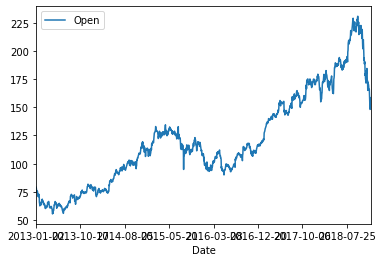

In [4]:
apple.plot(y = 'Open')

## Preprocessing
Scale data, use first sixty obs to predict 61st, etc.

In [5]:
apple_training_processed = apple.iloc[:, 0:1].values
apple_training_processed.shape

(1510, 1)

In [6]:
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)
apple_training_scaled.shape

(1510, 1)

In [7]:
features_set = []
labels = []

for i in range(60, 1510):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [8]:
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [10]:
len(features_set)

1450

In [14]:
features_set.shape[1]

60

## Train LSTM
LSTM with four layers of 50 units, dense layer at end to predict one value

In [17]:
model = Sequential()

In [18]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(features_set, labels, epochs = 50, batch_size = 60)

Epoch 1/50
1450/1450 [==============================] - 17s 11ms/step - loss: 0.0024
Epoch 2/50
 600/1450 [===========>..................] - ETA: 11s - loss: 0.0026

## Test Model

In [4]:
apple_test = pd.read_csv('AAPL_test.csv')
apple_test.set_index('Date', drop = True, inplace = True)
apple_testing_processed = apple_test.iloc[:, 0:1].values

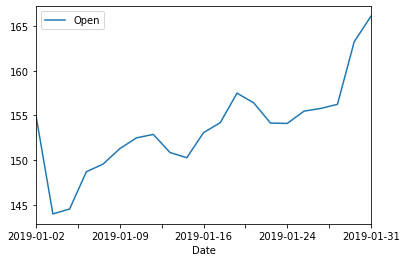

In [29]:
apple_test.plot(y = 'Open')

In [10]:
apple_total = pd.concat((apple['Open'], apple_test['Open']), axis=0)

In [14]:
apple.shape

(1510, 7)

In [12]:
test_inputs = apple_total[len(apple_total) - len(apple_test) - 60:].values
test_inputs.shape

(81,)

In [32]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [33]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [34]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

## Make Predictions

In [35]:
predictions = model.predict(test_features)

In [36]:
predictions = scaler.inverse_transform(predictions)

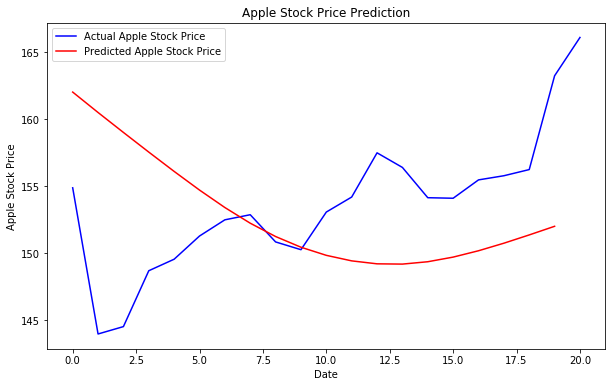

In [37]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()